In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Gold_data.csv')

LETS DO SOME EDA!


In [ ]:
df1= df.copy()

In [ ]:
# Display the first few rows of the dataset
print(df1.head())


         date    price
0  2016-01-01  2252.60
1  2016-01-02  2454.50
2  2016-01-03  2708.10
3  2016-01-04  2577.80
4  2016-01-05  2597.75


In [ ]:
# Get an overview of the dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB
None


In [ ]:
# Descriptive statistics of numerical columns
print(df1.describe())

             price
count  2182.000000
mean   3284.450046
std     719.564434
min    2252.600000
25%    2697.020000
50%    2879.800000
75%    4147.325000
max    4966.300000


In [ ]:
# Number of missing values in each column
print(df1.isnull().sum())

date     0
price    0
dtype: int64


#Data Visualization

In [ ]:
# Convert 'date' column to datetime type
df1['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index for time series analysis
df1.set_index('date', inplace=True)

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Scatter(x=df1.index, y=df['price'], mode='lines'))
fig.show()


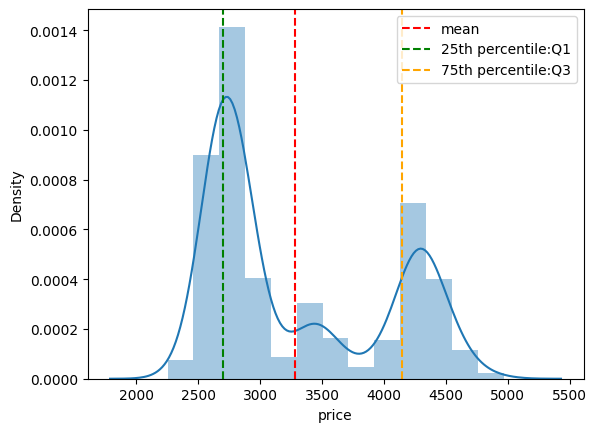

In [ ]:
sns.distplot(df1['price'])
plt.axvline(x=np.mean(df1['price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df1['price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df1['price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

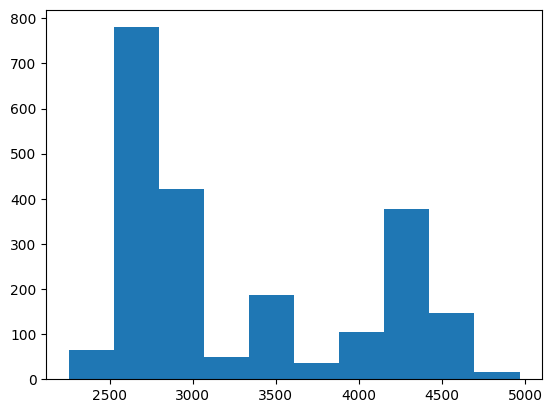

In [ ]:
plt.hist(df1["price"])
plt.show()

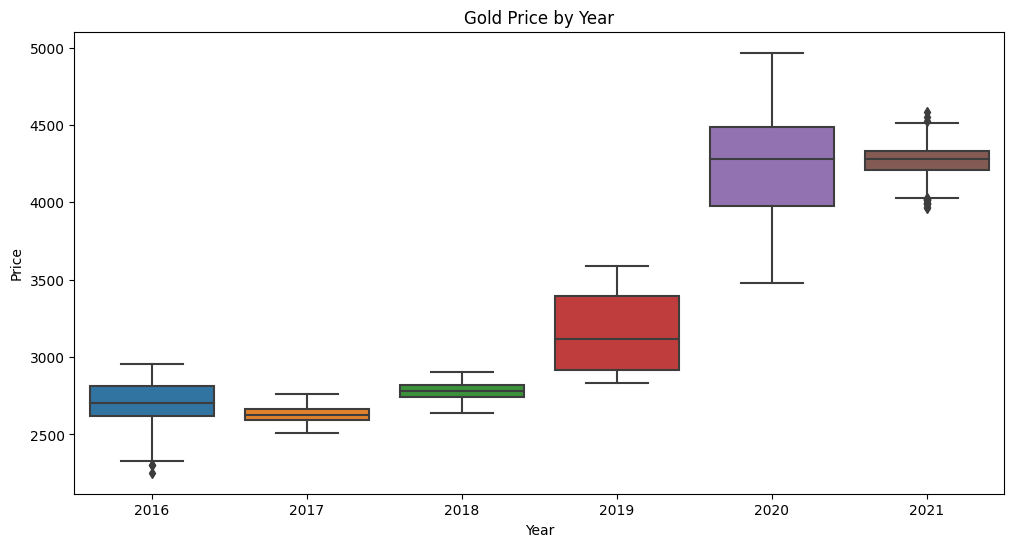

In [ ]:
# Box plot of gold price by year
df1['year'] = df1.index.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='price', data=df1)
plt.title('Gold Price by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [ ]:
pip install calplot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(<Figure size 1250x1020 with 7 Axes>,
 array([<Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>], dtype=object))

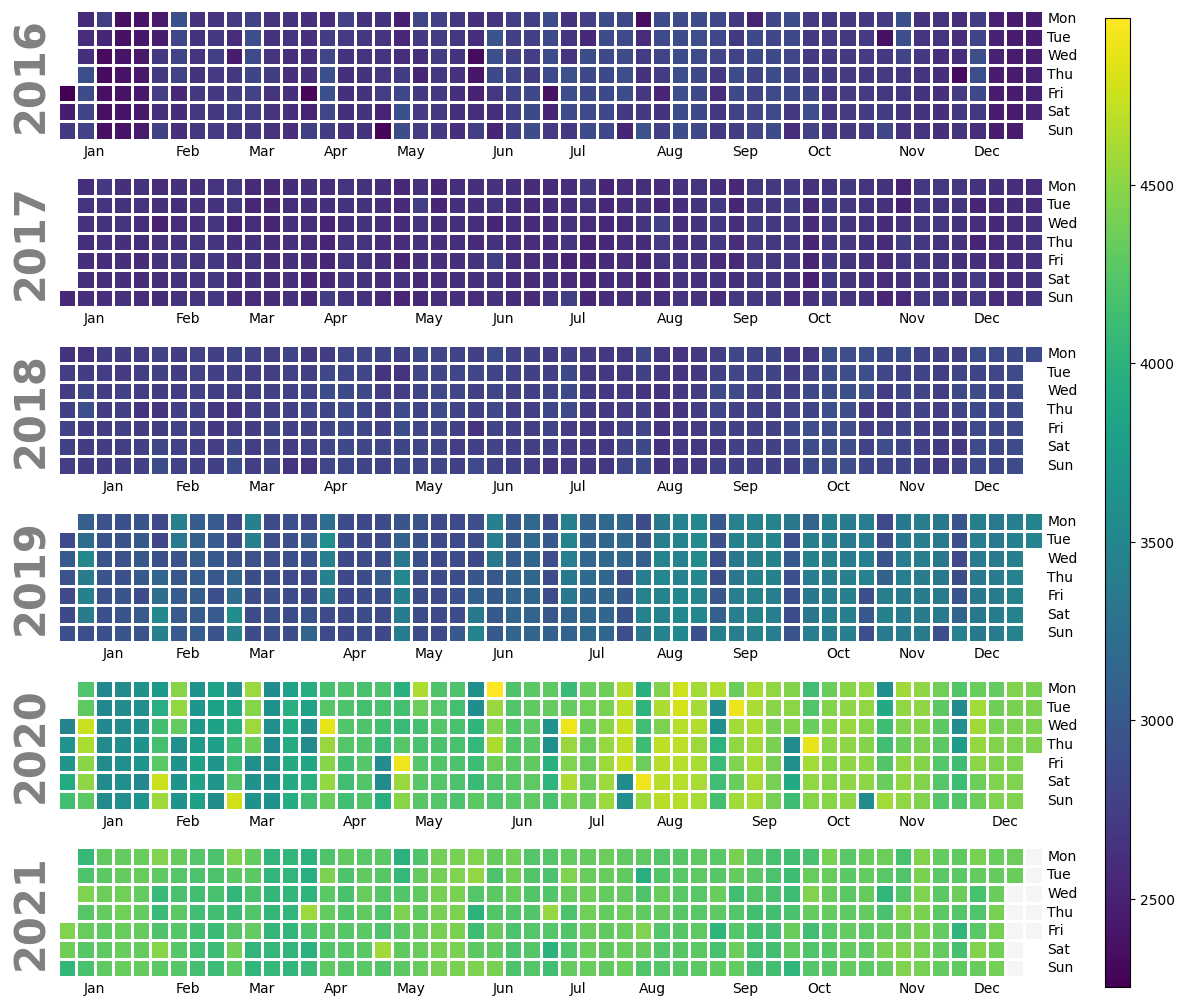

In [ ]:
import calplot
#visualize time series

calplot.calplot(df1['price'],edgecolor=None)

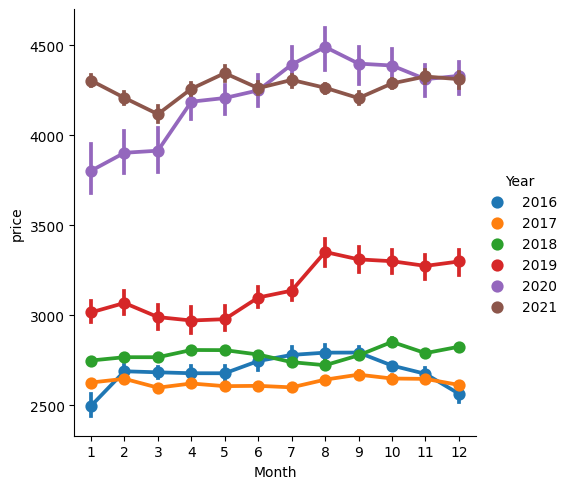

In [ ]:
# Extract year and month from the 'date' column
# Extract year and month from the 'date' column
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month

# Create a factor plot with Year on hue
sns.catplot(data=df1, x="Month", y="price", hue="Year", kind="point")

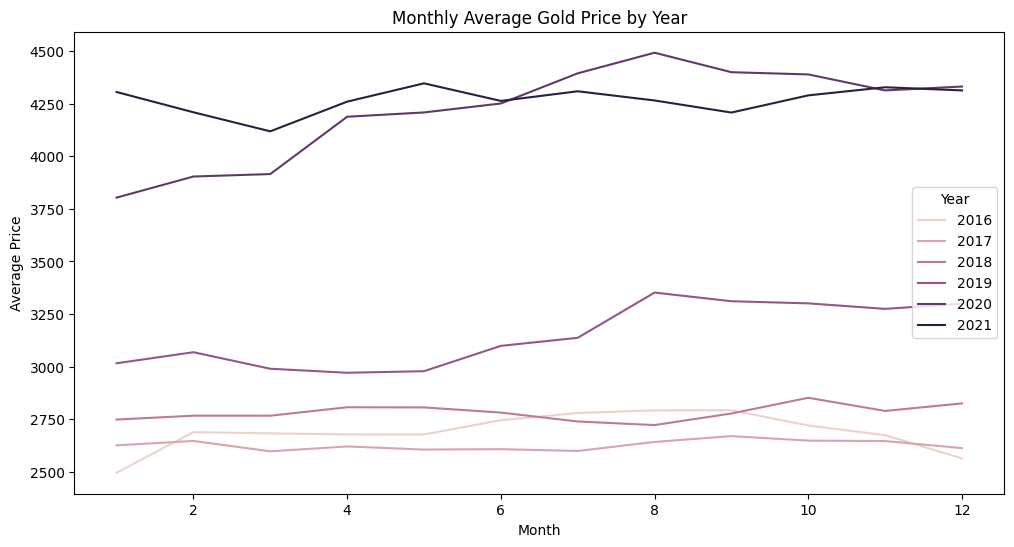

In [ ]:
# Group data by Year and Month and calculate average price
df_monthly_avg = df1.groupby(['Year', 'Month'])['price'].mean().reset_index()

# Line plot of monthly average gold price by Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_avg, x='Month', y='price', hue='Year')
plt.title('Monthly Average Gold Price by Year')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

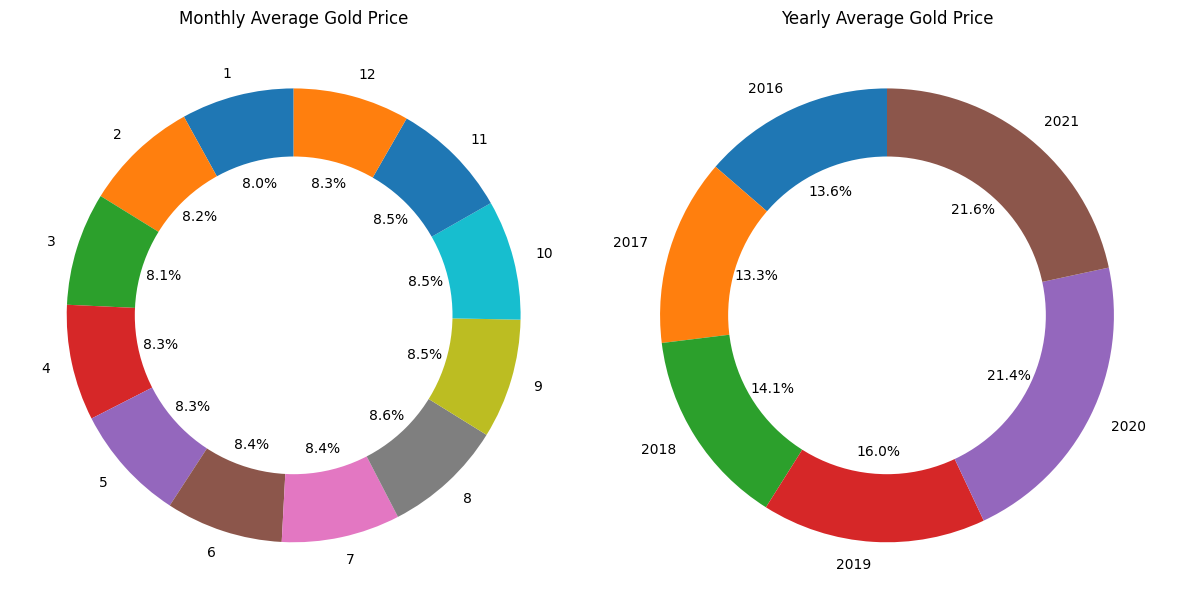

Month with the highest gold price: 8
Year with the highest gold price: 2021


In [ ]:
import matplotlib.pyplot as plt

# Calculate the monthly average gold price
df_monthly_avg = df1.groupby('Month')['price'].mean().reset_index()

# Find the month with the highest average gold price
highest_month = df_monthly_avg.loc[df_monthly_avg['price'].idxmax(), 'Month']

# Calculate the yearly average gold price
df_yearly_avg = df1.groupby('Year')['price'].mean().reset_index()

# Find the year with the highest average gold price
highest_year = df_yearly_avg.loc[df_yearly_avg['price'].idxmax(), 'Year']

# Create subplots for both donut charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Donut chart for the month with the highest gold price
axs[0].pie(df_monthly_avg['price'], labels=df_monthly_avg['Month'], autopct='%1.1f%%', startangle=90)
axs[0].add_artist(plt.Circle((0, 0), 0.7, fc='white'))
axs[0].set_title('Monthly Average Gold Price')

# Donut chart for the year with the highest gold price
axs[1].pie(df_yearly_avg['price'], labels=df_yearly_avg['Year'], autopct='%1.1f%%', startangle=90)
axs[1].add_artist(plt.Circle((0, 0), 0.7, fc='white'))
axs[1].set_title('Yearly Average Gold Price')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Print the month and year with the highest gold price
print('Month with the highest gold price:', highest_month)
print('Year with the highest gold price:', highest_year)


In [ ]:
Gold_data = df.copy()

In [ ]:
# Convert index to DatetimeIndex
Gold_data.index = pd.to_datetime(Gold_data.index)

# Extract month from the index
Gold_data['month'] = Gold_data.index.month_name()

# Convert month column to categorical datatype
month_categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Gold_data['month'] = pd.Categorical(Gold_data['month'], categories=month_categories, ordered=True)

# Sort dataframe by month
Gold_data = Gold_data.sort_values('month')

# Reset index
Gold_data.reset_index(inplace=True)

# Create dummy variables for month
dummy_df = pd.get_dummies(Gold_data['month'])

# Concatenate dummy variables with original dataframe
Gold_data = pd.concat([Gold_data, dummy_df], axis=1)

# Set 'date' column as index of the DataFrame again
Gold_data.set_index('date', inplace=True)

# Add a new column 't' containing sequential indexing
Gold_data['t'] = range(1, len(Gold_data) + 1)

# Print the updated DataFrame
print(Gold_data.head())


                                   index   price    month  January  February  \
date                                                                           
2016-01-01 1970-01-01 00:00:00.000000000  2252.6  January        1         0   
2020-01-03 1970-01-01 00:00:00.000001463  3672.8  January        1         0   
2020-01-02 1970-01-01 00:00:00.000001462  3649.3  January        1         0   
2020-01-01 1970-01-01 00:00:00.000001461  3477.6  January        1         0   
2019-12-31 1970-01-01 00:00:00.000001460  3477.3  January        1         0   

            March  April  May  June  July  August  September  October  \
date                                                                    
2016-01-01      0      0    0     0     0       0          0        0   
2020-01-03      0      0    0     0     0       0          0        0   
2020-01-02      0      0    0     0     0       0          0        0   
2020-01-01      0      0    0     0     0       0          0        0   
2

In [ ]:
Gold_data['log_price'] = np.log(Gold_data['price'])

In [ ]:
Gold_data['t_square'] = Gold_data['t'] ** 2

In [ ]:
Gold_data = Gold_data.drop('index', axis=1)

In [ ]:
Gold_data

,price,month,January,February,March,April,May,June,July,August,September,October,November,December,t,log_price,t_square
date,,,,,,,,,,,,,,,,,
2016-01-01,2252.600000,January,1,0,0,0,0,0,0,0,0,0,0,0,1,7.719840,1
2020-01-03,3672.800000,January,1,0,0,0,0,0,0,0,0,0,0,0,2,8.208710,4
2020-01-02,3649.300000,January,1,0,0,0,0,0,0,0,0,0,0,0,3,8.202291,9
2020-01-01,3477.600000,January,1,0,0,0,0,0,0,0,0,0,0,0,4,8.154098,16
2019-12-31,3477.300000,January,1,0,0,0,0,0,0,0,0,0,0,0,5,8.154011,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29,2644.800000,January,1,0,0,0,0,0,0,0,0,0,0,0,2178,7.880351,4743684
2017-12-30,2645.033333,January,1,0,0,0,0,0,0,0,0,0,0,0,2179,7.880439,4748041
2017-12-31,2645.266667,January,1,0,0,0,0,0,0,0,0,0,0,0,2180,7.880527,4752400


#Regression models

In [ ]:
train_len = 1746
train = Gold_data[0:train_len]
test = Gold_data[train_len:]

In [ ]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('price~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_linear))**2))
rmse_linear

134.10377561266557

In [ ]:
#Exponential

Exp = smf.ols('log_price~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


138.04380279946966

In [ ]:
#Quadratic 

Quad = smf.ols('price~t+t_square',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_Quad))**2))
rmse_Quad

1347.452512249355

In [ ]:
#Additive seasonality 

add_sea = smf.ols('price~January+February	+March	+April	+May	+June	+July	+August	+September	+October	+November	+December',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['January','February','March','April','May',	'June',	'July',	'August',	'September','October','November','December']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

718.8015906905791

In [ ]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('price~t+t_square+January+February	+March	+April	+May	+June	+July	+August	+September	+October	+November	+December',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['January','February','March','April','May',	'June',	'July',	'August',	'September','October','November','December','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1347.4525122526072

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_price~January+February	+March	+April	+May	+June	+July	+August	+September	+October	+November	+December',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

593.007521359403

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_price~t+January+February	+March	+April	+May	+June	+July	+August	+September	+October	+November	+December',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

138.0438027994689

In [ ]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,134.103776
6,rmse_Mult_add_sea,138.043803
1,rmse_Exp,138.043803
5,rmse_Mult_sea,593.007521
3,rmse_add_sea,718.801591
2,rmse_Quad,1347.452512
4,rmse_add_sea_quad,1347.452512


In [ ]:
data = df.copy()

In [ ]:
data

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [ ]:
data.columns = ['date', 'price']
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [ ]:
train_len = 1746
train = data[0:train_len]
test = data[train_len:]

#Data Driven models

**Exponential Smoothing Family**

Simple exponential smoothing (Captures - Only Level)

Holt's exponential smoothing (Level+Trend)

Holt's Winter exponential smoothing (Level+Trend+Seasonality)

In [ ]:
# Instantiate the model
model = SimpleExpSmoothing(train['price'])
# Fit the model with alpha = 0.2 
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE
model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 2252.6,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
y_hat_ses = test.copy()
# Forecast for 436 days
y_hat_ses['ses_forecast'] = model_fit.forecast(436)

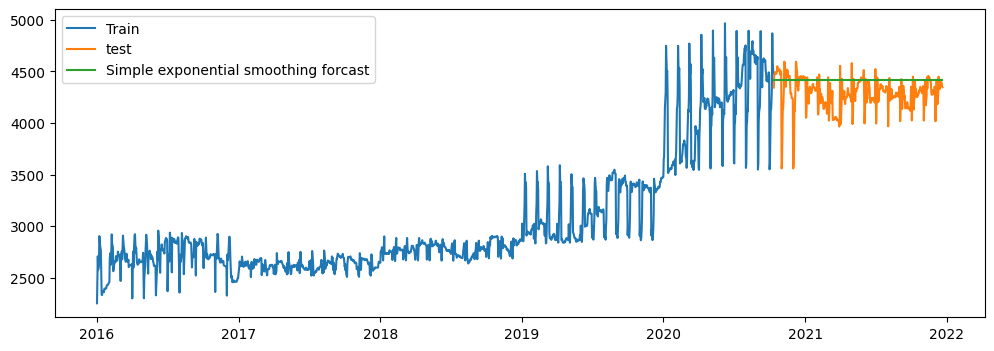

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

Analysis

No seasonality captures.

Most recent observation gets higher weightages than the older ones for forecasting.

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_ses['ses_forecast'])).round(2)
print(rmse)


194.88


In [ ]:
results = pd.DataFrame({'Method':['Simple expenential smoothing method'], 'RMSE':[rmse]})
results

,Method,RMSE
0,Simple expenential smoothing method,194.88


Holt's Exponential Smoothing method

Captures both Level and Trend .

In [ ]:
# We have to pass an array of the dataframe into the ExponentialSmoothing instance
# We are using additive trend 
# In case of geometric trend we can use multiplicative trend
# seasonal=None Because we are not capturing seasonality in this model
model = ExponentialSmoothing(np.asarray(train['price']), seasonal_periods = 436, trend='additive', seasonal=None)

In [ ]:
# smoothing_level. It is the level parameter (alpha)
# smoothing_slope - It is the trend parameter (beta) 
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 2352.7533333333313,
 'initial_trend': 55.874848484848656,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
y_hat_holt = test.copy()
# We are forecasting for next 436 days
y_hat_holt['holt_forecast'] = model_fit.forecast(436)

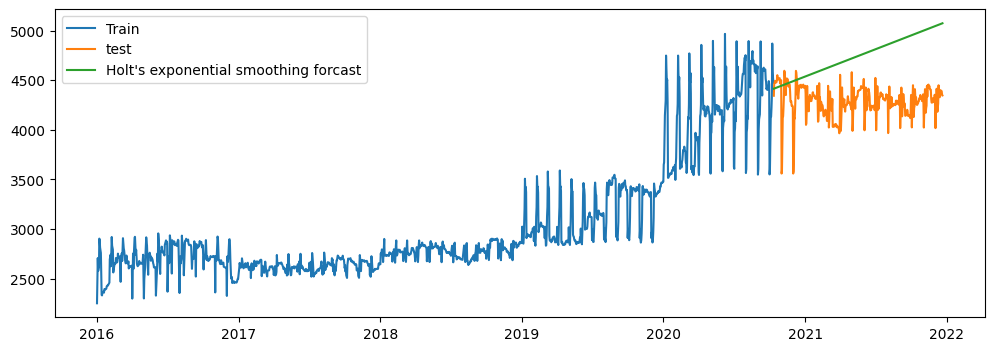

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

Analysis

We can see that we are able to capture the trend of the data. We were not able to capture the seasonality

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_holt['holt_forecast'])).round(2)
rmse

522.83

In [ ]:
results = results.append({'Method':'Holt\'s expenential smoothing method', 'RMSE':rmse}, ignore_index=True)
results

,Method,RMSE
0,Simple expenential smoothing method,194.88
1,Holt's expenential smoothing method,522.83


Holt-Winters's Exponential Smoothing

In [ ]:
y_hat_hwa = test.copy()

In [ ]:
# We have to pass an array of the dataframe into the ExponentialSmoothing instance
# seasonal_periods = 12. Because the seasonality is on monthly basis. If the seasonality would have quarterly basis then seasonal_periods = 4 (4 quarters in an year)
# seasonal=additive for additive method
model = ExponentialSmoothing(np.asarray(train['price']), seasonal_periods = 436, trend='add', seasonal='mul')

In [ ]:
# optimized=True . Here we are letting the system choose the optimal alpha, beta and gamma parameter.
model_fit = model.fit(optimized=True)

In [ ]:
model_fit.params

{'smoothing_level': 0.9596428571428571,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 2682.44611365953,
 'initial_trend': -0.26709955055122236,
 'initial_seasons': array([0.97144656, 0.97976032, 0.97182477, 0.96223148, 0.96669088,
        0.97846751, 0.98390163, 1.02097728, 1.02591925, 1.02530646,
        1.01338067, 1.00815324, 1.01888332, 1.02462808, 1.032543  ,
        1.02476704, 1.02218386, 1.00680549, 1.01725507, 1.02884901,
        1.02177031, 1.01861221, 1.02929708, 1.03517612, 1.01875307,
        1.01909467, 1.02165685, 1.0244723 , 1.04175593, 1.02931198,
        1.02547936, 0.9650112 , 0.9755634 , 0.96663114, 0.96477701,
        0.96236784, 0.97292121, 0.97921617, 1.01284718, 1.01794417,
        1.01424232, 1.00131201, 1.0031771 , 1.0115502 , 1.01391935,
        1.00794358, 1.00929102, 0.99684557, 1.0038642 , 1.01293298,
        1.01401626, 1.01676045, 1.00212155, 1.00320401, 0.9968834 ,
        1.00470619, 0.98691488, 0.9

In [ ]:
# Forecast for last 436 days
y_hat_hwa['hwa_forecast'] = model_fit.forecast(436)

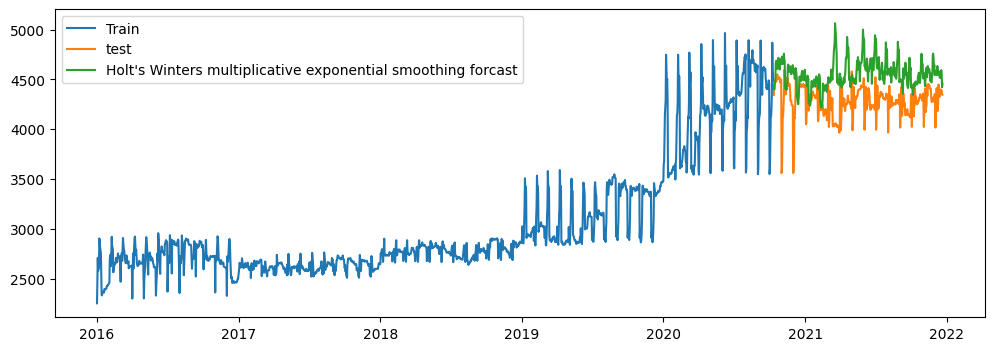

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters multiplicative exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_hwa['hwa_forecast'])).round(2)
rmse

342.53

In [ ]:
results = results.append({'Method':'Holt\'s Winter Exponential method', 'RMSE':rmse}, ignore_index=True)
results

,Method,RMSE
0,Simple expenential smoothing method,194.88
1,Holt's expenential smoothing method,522.83
2,Holt's Winter Exponential method,342.53


#Model Driven methods

Stationary vs Non-stationary Time Series

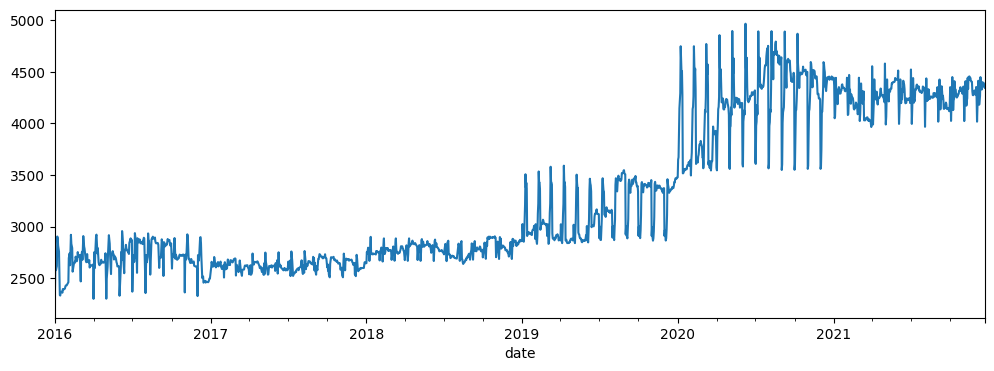

In [ ]:
data['price'].plot(figsize=(12,4))
plt.show()

# Augmented Dickey-Fuller (ADF) Test

Null Hypothesis (H0): The series is not stationary

p-val > 0.05

Alternate Hypothesis (H1): The series is stationary

p-val <= 0.05

In [ ]:
adf_test = adfuller(data['price'])
adf_test

(-0.30990365705047584,
 0.9240899189079189,
 26,
 2155,
 {'1%': -3.4333881004322455,
  '5%': -2.8628821222065013,
  '10%': -2.5674844795732152},
 26123.460351151632)

In [ ]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -0.309904
p-value: 0.924090
Critical value @ 0.05: -2.86


Analysis
p-value (0.92) > critical value(0.05) .

Failed to reject null hypothesis (The series is not stationary)

Hence, the time series is Non-Stationary.

# Converting Non-Stationary to Stationary Time Series

In [ ]:
# Creating a new dataset with the boxcox
data_boxcox = pd.Series(boxcox(data['price'], lmbda=0), data.index)
data_boxcox.head()

date
2016-01-01    7.719840
2016-01-02    7.805678
2016-01-03    7.904003
2016-01-04    7.854692
2016-01-05    7.862401
dtype: float64

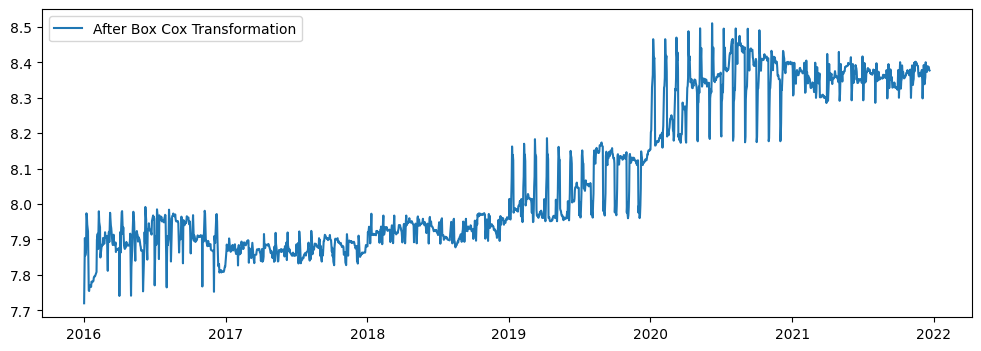

In [ ]:
# Plotting the Time series after transformation
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

Differencing


Differencing is performed by subtracting the previous observation from the current observation.



Differencing removes trend and seasonality in a Time series. When an entire cycle is used for differencing the other cycle, then the seasonality is removed.

In [ ]:
# data_boxcox - data_boxcox.shift() :- Performs difference between the previous and current observations.
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)

In [ ]:
# data_boxcox - data_boxcox.shift() :- Performs difference between the previous and current observations.
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)

In [ ]:
# As the first record becomes null. Hence removing the frist observation.
data_boxcox_diff.dropna(inplace=True)

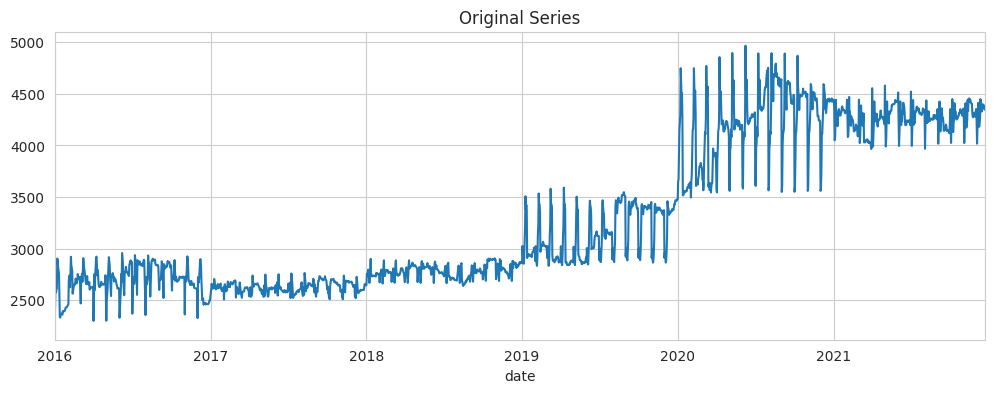

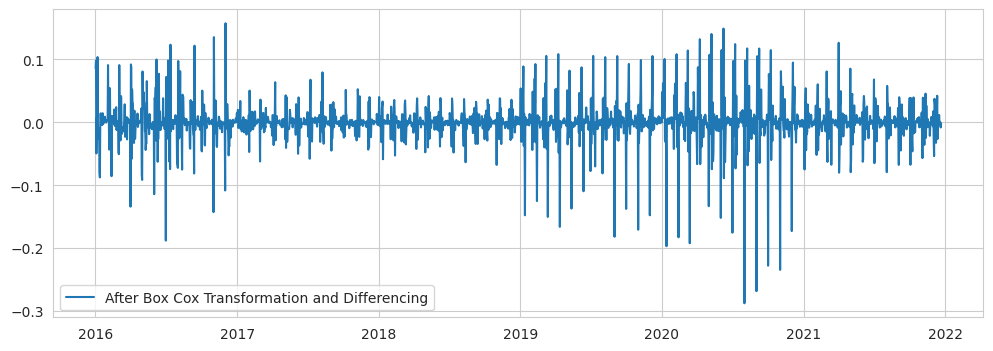

In [ ]:
import matplotlib.pyplot as plt

# Plotting the original series
plt.figure(figsize=(12, 4))
data['price'].plot()
plt.title('Original Series')
plt.show()


# Plotting the time series after Box Cox transformation and differencing
plt.figure(figsize=(12, 4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()


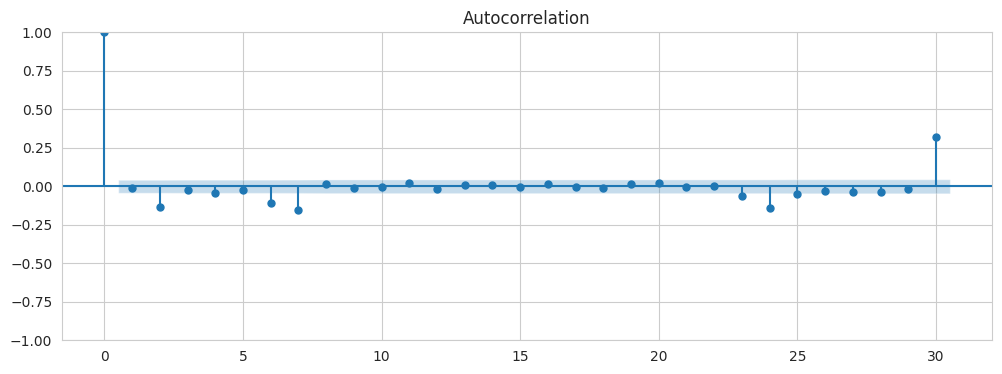

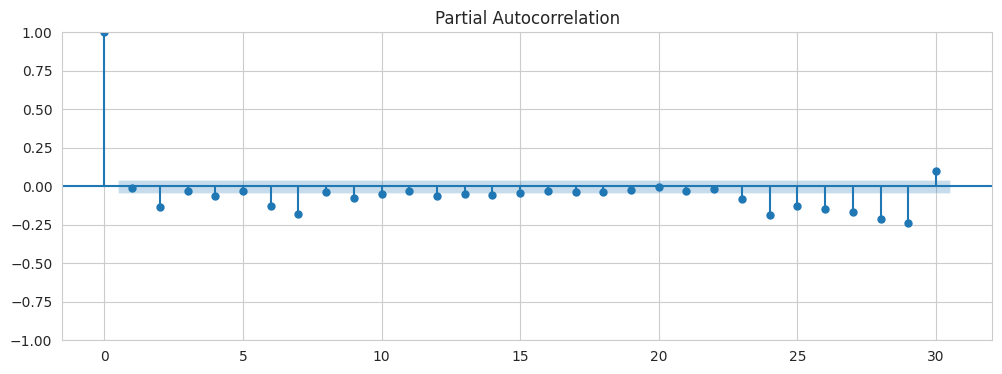

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation Plot
plt.figure(figsize=(12, 4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.title('Autocorrelation')
plt.show()

# Partial Autocorrelation Plot
plt.figure(figsize=(12, 4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation')
plt.show()

In [ ]:
# Splitting data_boxcox
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

In [ ]:
order = (2, 1, 2)  # Specify the order of the ARIMA model
model = ARIMA(train_data_boxcox, order=order)
model_fit = model.fit()

In [ ]:
predictions_boxcox = model_fit.predict(start=len(train_data_boxcox), end=len(train_data_boxcox)+len(test_data_boxcox)-1)

In [ ]:
predictions = np.exp(predictions_boxcox)

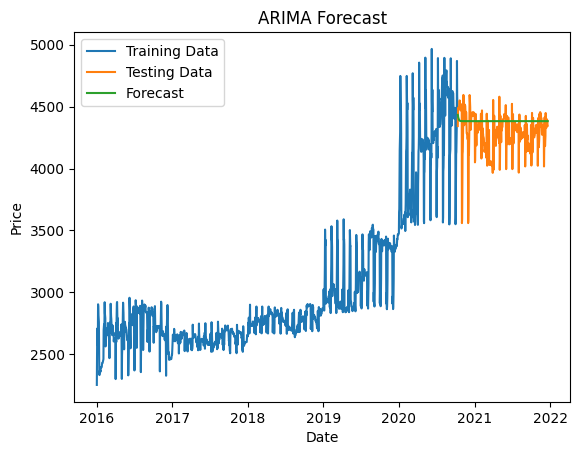

In [ ]:
# Plotting the training data
plt.plot(train.index, train['price'], label='Training Data')

# Plotting the testing data
plt.plot(test.index, test['price'], label='Testing Data')

# Plotting the forecasted values
plt.plot(test.index, predictions, label='Forecast')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [ ]:
# Inverse the Box-Cox transformation on the forecasted values
forecasted_prices = np.exp(predictions_boxcox)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['price'], forecasted_prices))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 177.28742207656884


#SARIMAX

In [ ]:

gold = pd.read_csv('Gold_data.csv', header=0)
gold.columns = ['date', 'price']
gold['date'] = pd.to_datetime(gold['date'], format='%Y-%m-%d')
gold = gold.set_index('date')


In [ ]:

train_len = 1746
train = gold[0:train_len]
test = gold[train_len:]


In [ ]:

## Splitting promotional dataset into train and test set
gold_train = gold[:train_len]
gold_test = gold[train_len:]


In [ ]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12), exog=train)

In [ ]:

model_fit = model.fit()
model_fit.params


price       0.000281
ar.L1       0.311144
ma.L1      -0.497034
ar.S.L12   -0.204770
ma.S.L12   -0.485599
sigma2      0.000087
dtype: float64

In [ ]:
y_hat_sarimax = data_boxcox_diff.copy()

In [ ]:
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(test.index.min(), test.index.max(), exog=gold_test)

In [ ]:
# Reversing the transformation
# Note:- Reversing the differencing is automatically taken care by SARIMAX
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

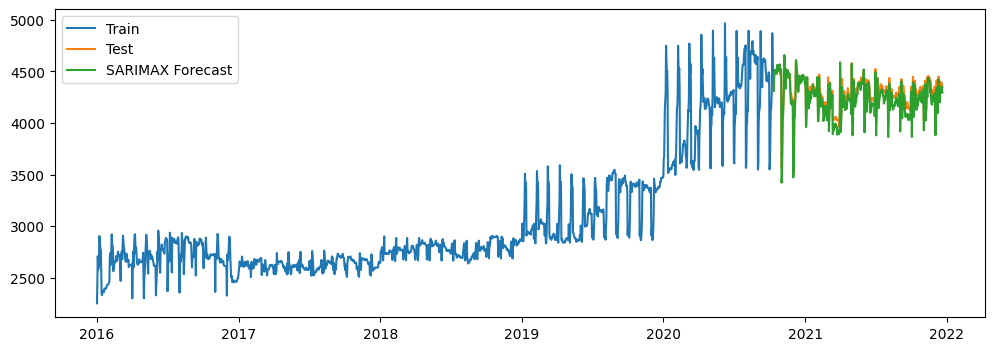

In [ ]:

plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'], label='SARIMAX Forecast')
plt.legend(loc='best')
plt.show()


In [ ]:

rmse = np.sqrt(mean_squared_error(test['price'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
rmse


66.92

Comparing results of various models


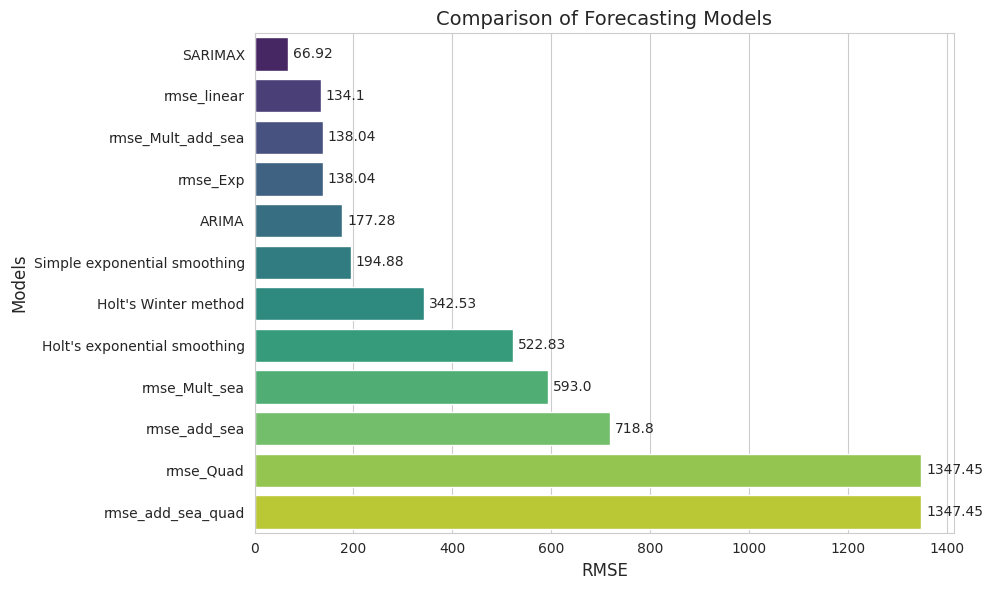

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their corresponding RMSE values
model_names = ["rmse_linear", "rmse_Mult_add_sea", "rmse_Exp", "rmse_Mult_sea", "rmse_add_sea",
               "rmse_Quad", "rmse_add_sea_quad", "Simple exponential smoothing", "Holt's exponential smoothing",
               "Holt's Winter method", "ARIMA", "SARIMAX"]
rmse_values = [134.10, 138.04, 138.04, 593.00, 718.80, 1347.45, 1347.45, 194.88, 522.83, 342.53, 177.28, 66.92]

# Sort the RMSE values and model names in ascending order
sorted_indices = sorted(range(len(rmse_values)), key=lambda k: rmse_values[k])
rmse_values = [rmse_values[i] for i in sorted_indices]
model_names = [model_names[i] for i in sorted_indices]

# Set the style
sns.set_style("whitegrid")

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=rmse_values, y=model_names, palette="viridis")
plt.xlabel("RMSE", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.title("Comparison of Forecasting Models", fontsize=14)

# Add data labels
for i, v in enumerate(rmse_values):
    plt.text(v + 10, i, str(v), ha='left', va='center', fontsize=10)

# Adjusting the plot margins
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig("forecasting_models_comparison.png")

# Display the plot
plt.show()


Choosing SARIMAX MODEL!

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
gold = pd.read_csv('Gold_data.csv', header=0)
gold.columns = ['date', 'price']
gold['date'] = pd.to_datetime(gold['date'], format='%Y-%m-%d')
gold = gold.set_index('date')

# Split data into train and test sets
train_len = 1746
train = gold.iloc[:train_len]
test = gold.iloc[train_len:]

# Apply Box-Cox transformation
data_boxcox = pd.Series(boxcox(gold['price'], lmbda=0), gold.index)

# Take the difference of the transformed data
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=gold.index)
data_boxcox_diff.dropna(inplace=True)

# Split Box-Cox transformed data into train and test sets
train_data_boxcox = data_boxcox.iloc[:train_len]
test_data_boxcox = data_boxcox.iloc[train_len:]

# Fit the SARIMAX model
model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast for the next 30 days after the test data
forecast_start = test.index.min()
forecast_end = test.index.max() + pd.DateOffset(days=30)
exog_forecast = gold.loc[forecast_start:forecast_end]

y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(forecast_start, forecast_end, exog=exog_forecast)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

# Retrieve the forecast for the next 30 days
forecast = y_hat_sarimax['sarimax_forecast'][-30:]


In [ ]:
print("Forecast for the next 30 days:")
print(forecast)

Forecast for the next 30 days:
2021-12-22    5254.407719
2021-12-23    5260.326350
2021-12-24    5278.620102
2021-12-25    5265.879626
2021-12-26    5286.784211
2021-12-27    5283.111501
2021-12-28    5277.184534
2021-12-29    5265.312278
2021-12-30    5277.807544
2021-12-31    5271.335905
2022-01-01    5283.960154
2022-01-02    5279.860020
2022-01-03    5278.157438
2022-01-04    5284.102821
2022-01-05    5302.479260
2022-01-06    5289.681198
2022-01-07    5310.680271
2022-01-08    5306.990960
2022-01-09    5301.037204
2022-01-10    5289.111286
2022-01-11    5301.663029
2022-01-12    5295.162139
2022-01-13    5307.843449
2022-01-14    5303.724783
2022-01-15    5302.014505
2022-01-16    5307.986761
2022-01-17    5326.446261
2022-01-18    5313.590352
2022-01-19    5334.684340
2022-01-20    5330.978354
Freq: D, Name: predicted_mean, dtype: float64


# ----------  **THE END** ----------